Product Sales Analysis

In [43]:
#import the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#Load the dataset
maindf=pd.read_csv(r'D:\Aaall\My resume projects\Product Sales Analysis\productsalesanalysis.csv')

In [45]:
maindf.shape

(730, 13)

In [46]:
maindf.head()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


In [47]:
maindf.tail()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
725,56101,Not Specified,44,5347.13,Regular Air,1886.41,Bill Donatelli,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,GBC Therma-A-Bind 250T Electric Binding System,Small Box
726,1059,Critical,22,127.33,Regular Air,5.30,Sean O'Donnell,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,Wilson Jones 14 Line Acrylic Coated Pressboard...,Small Box
727,1059,Critical,24,990.10,Regular Air,310.22,Sean O'Donnell,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",Small Box
728,1826,Not Specified,5,28.32,Regular Air,-14.35,Susan Vittorini,Ontario,Corporate,Office Supplies,Paper,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,Small Box
729,20003,Medium,39,796.08,Regular Air,30.29,Shirley Schmidt,Ontario,Corporate,Technology,Computer Peripherals,Belkin 105-Key Black Keyboard,Small Box


In [48]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_ID              730 non-null    int64  
 1   Order_Priority        730 non-null    object 
 2   Order_Quantity        730 non-null    int64  
 3   Sales                 730 non-null    float64
 4   Ship_Mode             730 non-null    object 
 5   Profit                730 non-null    float64
 6   Customer_Name         730 non-null    object 
 7   Region                730 non-null    object 
 8   Customer_Segment      730 non-null    object 
 9   Product_Category      730 non-null    object 
 10  Product_Sub-Category  730 non-null    object 
 11  Product_Name          730 non-null    object 
 12  Product_Container     730 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 74.3+ KB


In [49]:
maindf.describe()

,Order_ID,Order_Quantity,Sales,Profit
count,730.000000,730.000000,730.000000,730.000000
mean,29721.597260,24.857534,1502.777653,207.479233
std,17350.560439,14.182970,2893.936648,878.631028
min,35.000000,1.000000,8.600000,-4437.910000
25%,14479.000000,13.000000,171.098375,-77.132500
50%,29350.500000,25.000000,438.700000,0.035000
75%,44978.500000,37.000000,1480.855000,180.000000
max,59909.000000,50.000000,27663.920000,8417.570000


Checking for Null Values

In [58]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [60]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [62]:
# If dataset had null values we can use this code to drop all the null values present in the dataset

# maindf=maindf.dropna()
# print('Null Values:',maindf.isnull().values.sum())
# print('NA values:',maindf.isnull().values.any())

In [64]:
# Final shape of the dataset after dealing with null values 
maindf.shape

(730, 13)

EDA(Exploratory Data Analysis)

1.Sales and Profitability by Product

Use Case: Identify top-performing and low-performing products based on sales and profit.

In [68]:
product_sales_profit = maindf.groupby('Product_Name').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
top_products = product_sales_profit.sort_values(by='Profit', ascending=False).head().to_string()
bottom_products = product_sales_profit.sort_values(by='Profit').head().to_string()
print("Top Profitable Products:\n", top_products)
print("Low Performing Products:\n", bottom_products)

Top Profitable Products:
                                                                     Product_Name       Sales   Profit
172  Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind  19417.5500  8417.57
284                        Polycom ViaVideo��� Desktop Video Communications Unit  16066.8500  7416.43
108                                             Canon MP41DH Printing Calculator  18504.5900  6850.13
225                                    Hoover WindTunnel��� Plus Canister Vacuum  23514.3200  6622.43
9                                                                          2160i  24917.7075  6521.30
Low Performing Products:
                                     Product_Name     Sales   Profit
112        Canon imageCLASS 2200 Advanced Copier  31336.81 -3453.74
223         Hoover Portapower��� Portable Vacuum    326.83 -2464.32
111           Canon PC1060 Personal Laser Copier  39909.23 -2319.90
302        SAFCO Commercial Wire Shelving, Black  11776.18 -2160

2.Display the top 5 and bottom 5 products of the each region according to the user input


In [73]:
# Display unique regions for user input
regions = maindf['Region'].unique()
print("Available regions for analysis:")
for region in regions:
    print(region)

# Ask the user to input a region
selected_region = input("Please enter a region from the list above: ")

# Filter data by the selected region
region_data = maindf[maindf['Region'] == selected_region]

# Calculate top 5 and bottom 5 profitable products
top_products = region_data.nlargest(5, 'Profit')[['Product_Name', 'Profit']]
bottom_products = region_data.nsmallest(5, 'Profit')[['Product_Name', 'Profit']]

# Display results
print(f"\nTop 5 Profitable Products in {selected_region}:\n", top_products)
print(f"\nBottom 5 Profitable Products in {selected_region}:\n", bottom_products)

Available regions for analysis:
Nunavut
Northwest Territories
Atlantic
West
Ontario
Prarie


Please enter a region from the list above:  Northwest Territories



Top 5 Profitable Products in Northwest Territories:
                                           Product_Name   Profit
422  Fellowes PB500 Electric Punch Plastic Comb Bin...  8417.57
16   Polycom ViaVideo��� Desktop Video Communicatio...  7416.43
29                      Sharp AL-1530CS Digital Copier  6907.61
85   Polycom ViewStation��� Adapter H323 Videoconfe...  5322.14
26      Lifetime Advantage��� Folding Chairs, 4/Carton  3387.35

Bottom 5 Profitable Products in Northwest Territories:
                                  Product_Name   Profit
5        Hoover Portapower��� Portable Vacuum -2088.68
30      SAFCO Commercial Wire Shelving, Black  -942.50
4                 Tennsco Industrial Shelving  -743.96
409  Deluxe Rollaway Locking File with Drawer  -539.59
404  Deluxe Rollaway Locking File with Drawer  -517.47


In [67]:
regions = maindf['Region'].unique()
print("Available regions for analysis:")
for region in regions:
    print(region)

# Ask the user to input a region
selected_region = input("Please enter a region from the list above: ")

# Filter data by the selected region
region_data = maindf[maindf['Region'] == selected_region]

# Calculate top 5 and bottom 5 profitable products
top_products = region_data.nlargest(5, 'Profit')[['Product_Name', 'Profit']]
bottom_products = region_data.nsmallest(5, 'Profit')[['Product_Name', 'Profit']]

# Display results
print(f"\nTop 5 Profitable Products in {selected_region}:\n", top_products)
print(f"\nBottom 5 Profitable Products in {selected_region}:\n", bottom_products)

Available regions for analysis:
Nunavut
Northwest Territories
Atlantic
West
Ontario
Prarie


Please enter a region from the list above:  Northwest Territories



Top 5 Profitable Products in Northwest Territories:
                                           Product_Name   Profit
422  Fellowes PB500 Electric Punch Plastic Comb Bin...  8417.57
16   Polycom ViaVideo��� Desktop Video Communicatio...  7416.43
29                      Sharp AL-1530CS Digital Copier  6907.61
85   Polycom ViewStation��� Adapter H323 Videoconfe...  5322.14
26      Lifetime Advantage��� Folding Chairs, 4/Carton  3387.35

Bottom 5 Profitable Products in Northwest Territories:
                                  Product_Name   Profit
5        Hoover Portapower��� Portable Vacuum -2088.68
30      SAFCO Commercial Wire Shelving, Black  -942.50
4                 Tennsco Industrial Shelving  -743.96
409  Deluxe Rollaway Locking File with Drawer  -539.59
404  Deluxe Rollaway Locking File with Drawer  -517.47


In [69]:
regions = maindf['Region'].unique()
print("Available regions for analysis:")
for region in regions:
    print(region)

# Ask the user to input a region
selected_region = input("Please enter a region from the list above: ")

# Filter data by the selected region
region_data = maindf[maindf['Region'] == selected_region]

# Calculate top 5 and bottom 5 profitable products
top_products = region_data.nlargest(5, 'Profit')[['Product_Name', 'Profit']]
bottom_products = region_data.nsmallest(5, 'Profit')[['Product_Name', 'Profit']]

# Display results
print(f"\nTop 5 Profitable Products in {selected_region}:\n", top_products)
print(f"\nBottom 5 Profitable Products in {selected_region}:\n", bottom_products)

Available regions for analysis:
Nunavut
Northwest Territories
Atlantic
West
Ontario
Prarie


Please enter a region from the list above:  Atlantic



Top 5 Profitable Products in Atlantic:
                                           Product_Name   Profit
66   Holmes Harmony HEPA Air Purifier for 17 x 20 Room  3506.24
164            GBC DocuBind 200 Manual Binding Machine  3049.45
457           GBC DocuBind P100 Manual Binding Machine  2665.40
167                                             CF 888  2549.40
217                                                T65  2374.73

Bottom 5 Profitable Products in Atlantic:
                                          Product_Name   Profit
43              Canon imageCLASS 2200 Advanced Copier -3061.82
21  Lesro Sheffield Collection Coffee Table, End T... -1561.72
99  Eldon ClusterMat Chair Mat with Cordless Antis... -1396.22
39                     Sharp AL-1530CS Digital Copier -1011.32
23            Carina 42"Hx23 3/4"W Media Storage Unit  -849.18


In [71]:
regions = maindf['Region'].unique()
print("Available regions for analysis:")
for region in regions:
    print(region)

# Ask the user to input a region
selected_region = input("Please enter a region from the list above: ")

# Filter data by the selected region
region_data = maindf[maindf['Region'] == selected_region]

# Calculate top 5 and bottom 5 profitable products
top_products = region_data.nlargest(5, 'Profit')[['Product_Name', 'Profit']]
bottom_products = region_data.nsmallest(5, 'Profit')[['Product_Name', 'Profit']]

# Display results
print(f"\nTop 5 Profitable Products in {selected_region}:\n", top_products)
print(f"\nBottom 5 Profitable Products in {selected_region}:\n", bottom_products)

Available regions for analysis:
Nunavut
Northwest Territories
Atlantic
West
Ontario
Prarie


Please enter a region from the list above:  West



Top 5 Profitable Products in West:
                                           Product_Name   Profit
592          Hoover WindTunnel��� Plus Canister Vacuum  4604.79
581         GBC DocuBind TL300 Electric Binding System  3724.57
198         Hayes Optima 56K V.90 Internal Voice Modem  3392.88
523              Dual Level, Single-Width Filing Carts  3051.62
56   Honeywell Enviracaire Portable HEPA Air Cleane...  2848.17

Bottom 5 Profitable Products in West:
                                           Product_Name   Profit
55                  Canon PC1060 Personal Laser Copier -4437.91
52                          Laminate Occasional Tables -1640.51
69   Eldon Cleatmat Plus��� Chair Mats for High Pil...  -673.31
569                                          T28 WORLD  -554.44
185               Adesso Programmable 142-Key Keyboard  -521.09


In [73]:
regions = maindf['Region'].unique()
print("Available regions for analysis:")
for region in regions:
    print(region)

# Ask the user to input a region
selected_region = input("Please enter a region from the list above: ")

# Filter data by the selected region
region_data = maindf[maindf['Region'] == selected_region]

# Calculate top 5 and bottom 5 profitable products
top_products = region_data.nlargest(5, 'Profit')[['Product_Name', 'Profit']]
bottom_products = region_data.nsmallest(5, 'Profit')[['Product_Name', 'Profit']]

# Display results
print(f"\nTop 5 Profitable Products in {selected_region}:\n", top_products)
print(f"\nBottom 5 Profitable Products in {selected_region}:\n", bottom_products)

Available regions for analysis:
Nunavut
Northwest Territories
Atlantic
West
Ontario
Prarie


Please enter a region from the list above:  Ontario



Top 5 Profitable Products in Ontario:
                                        Product_Name   Profit
116                        Polycom VoiceStation 100  5455.96
702    Kensington 7 Outlet MasterPiece Power Center  2998.88
236       Hoover WindTunnel��� Plus Canister Vacuum  2017.64
725  GBC Therma-A-Bind 250T Electric Binding System  1886.41
716                                 Talkabout T8097  1653.97

Bottom 5 Profitable Products in Ontario:
                                     Product_Name  Profit
15     Space Solutions Commercial Steel Shelving -929.68
14         SAFCO Commercial Wire Shelving, Black -522.94
717  Fellowes PB300 Plastic Comb Binding Machine -228.24
722                                          T18 -212.55
242                           Staples File Caddy -188.02


In [75]:
regions = maindf['Region'].unique()
print("Available regions for analysis:")
for region in regions:
    print(region)

# Ask the user to input a region
selected_region = input("Please enter a region from the list above: ")

# Filter data by the selected region
region_data = maindf[maindf['Region'] == selected_region]

# Calculate top 5 and bottom 5 profitable products
top_products = region_data.nlargest(5, 'Profit')[['Product_Name', 'Profit']]
bottom_products = region_data.nsmallest(5, 'Profit')[['Product_Name', 'Profit']]

# Display results
print(f"\nTop 5 Profitable Products in {selected_region}:\n", top_products)
print(f"\nBottom 5 Profitable Products in {selected_region}:\n", bottom_products)

Available regions for analysis:
Nunavut
Northwest Territories
Atlantic
West
Ontario
Prarie


Please enter a region from the list above:  Prarie



Top 5 Profitable Products in Prarie:
                                   Product_Name   Profit
675                                  T28 WORLD  2311.96
697      Gyration Ultra Cordless Optical Suite  1653.96
511                                       T39m  1380.32
502  24 Capacity Maxi Data Binder Racks, Pearl   905.57
344                                       8890   894.06

Bottom 5 Profitable Products in Prarie:
                                           Product_Name   Profit
50                         Tennsco Commercial Shelving -1195.29
60             Carina 42"Hx23 3/4"W Media Storage Unit  -684.78
51                         Tennsco Industrial Shelving  -628.38
341                                               8290  -492.77
48   Lesro Round Back Collection Coffee Table, End ...  -367.00


2.Order Priority vs. Profit

Use Case: Understand how order priority affects profit.

In [75]:
priority_profit = maindf.groupby('Order_Priority').agg({'Profit': 'mean'}).reset_index()
print(priority_profit)


  Order_Priority      Profit
0       Critical  157.547823
1           High  209.259013
2            Low  275.062925
3         Medium  220.079766
4  Not Specified  178.772308


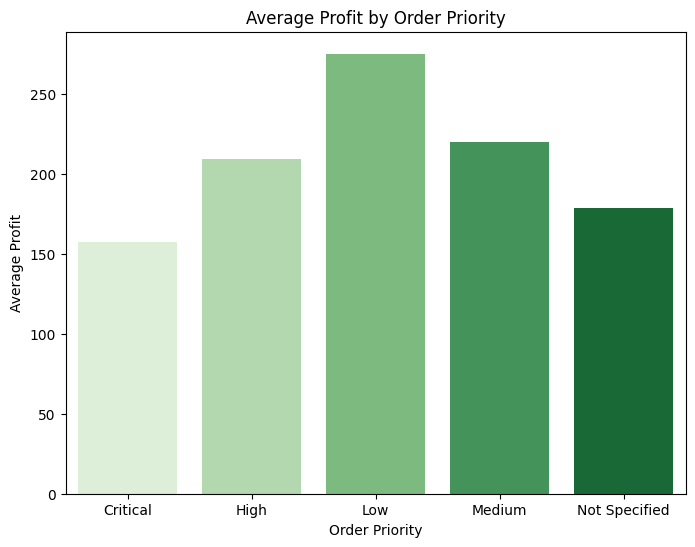

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `priority_profit` is already calculated
# Bar plot with `hue` assigned and legend turned off
plt.figure(figsize=(8, 6))
sns.barplot(x='Order_Priority', y='Profit', data=priority_profit, hue='Order_Priority', palette='Greens', dodge=False, legend=False)
plt.title('Average Profit by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Average Profit')
plt.show()

3.Profitability by Customer Segment

Use Case: Identify the most and least profitable customer segments.

In [135]:
segment_profit = maindf.groupby('Customer_Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
print(segment_profit.sort_values(by='Profit', ascending=False))


  Customer_Segment        Sales     Profit
1        Corporate  805343.1240  120106.44
0         Consumer  186041.2210   18641.47
2      Home Office   70363.1295   11619.34
3   Small Business   35280.2125    1092.59


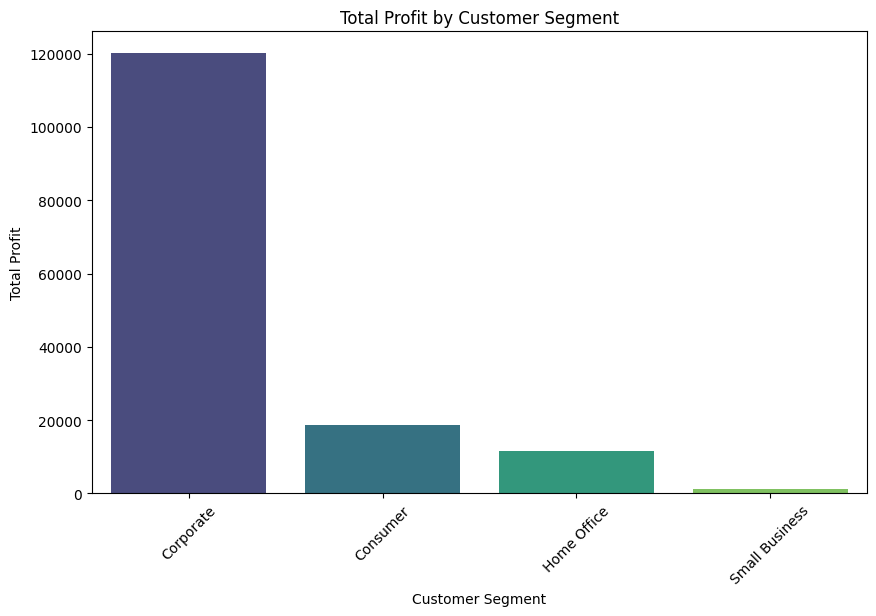

In [137]:
# Sort data by Profit in descending order
segment_profit_sorted = segment_profit.sort_values(by='Profit', ascending=False)

# Vertical bar plot with `hue` assigned and legend turned off
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_profit_sorted, x='Customer_Segment', y='Profit', palette='viridis', hue='Customer_Segment', dodge=False, legend=False)
plt.title('Total Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()


In [139]:
shipmode_profit = maindf.groupby('Ship_Mode').agg({'Profit': 'mean'}).reset_index()
print(shipmode_profit)

     Ship_Mode      Profit
0  Express Air  219.596821
1  Regular Air  204.319033


4.Sales and Profit by Region

Use Case: Determine which regions are most and least profitable.

In [142]:
region_profit = maindf.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
print(region_profit.sort_values(by='Profit', ascending=False))

                  Region        Sales    Profit
1  Northwest Territories  275140.7555  59551.86
5                   West  346001.4240  39414.21
0               Atlantic  271205.1010  28393.28
3                Ontario   81727.7725  16375.46
4                 Prarie   86646.1360   6944.32
2                Nunavut   36306.4980    780.71


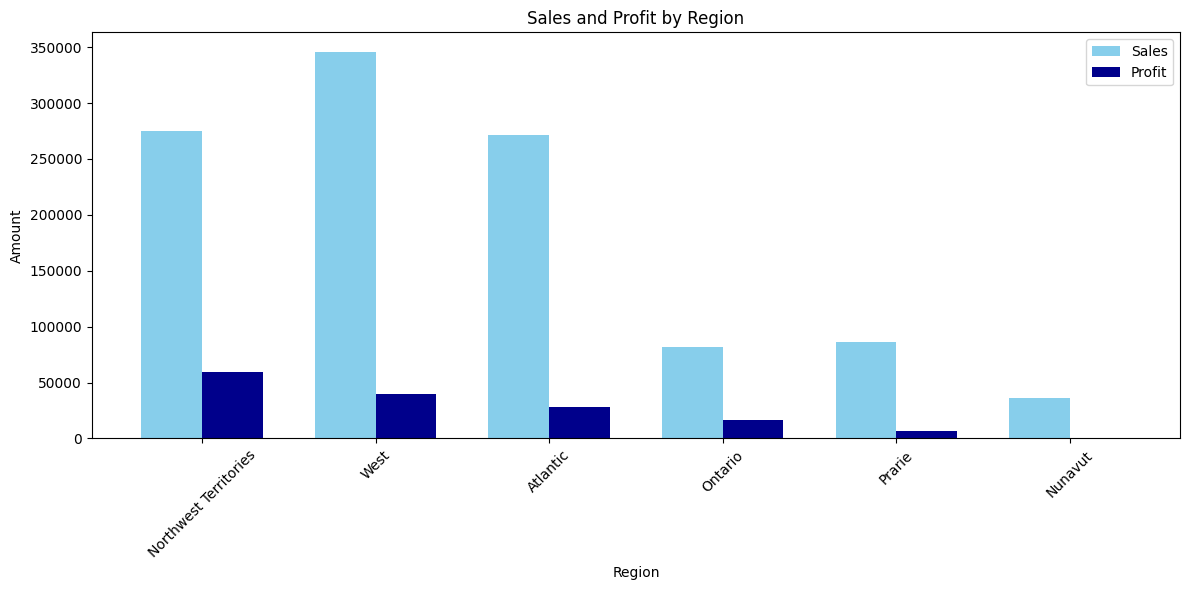

In [144]:
# Sort data by Profit in descending order for clarity
region_profit_sorted = region_profit.sort_values(by='Profit', ascending=False)

# Define bar width and set up the figure
bar_width = 0.35
index = np.arange(len(region_profit_sorted))

plt.figure(figsize=(12, 6))

# Plot bars for Sales and Profit side by side
plt.bar(index, region_profit_sorted['Sales'], bar_width, label='Sales', color='skyblue')
plt.bar(index + bar_width, region_profit_sorted['Profit'], bar_width, label='Profit', color='darkblue')

# Set labels, title, and ticks
plt.xlabel('Region')
plt.ylabel('Amount')
plt.title('Sales and Profit by Region')
plt.xticks(index + bar_width / 2, region_profit_sorted['Region'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


5.Product Category Performance

Use Case: Understand which product categories drive the most profit.

In [147]:
category_performance = maindf.groupby('Product_Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
print(category_performance.sort_values(by='Profit', ascending=False))


  Product_Category       Sales    Profit
2       Technology  561675.807  81368.05
1  Office Supplies  383538.340  53073.95
0        Furniture  151813.540  17017.84


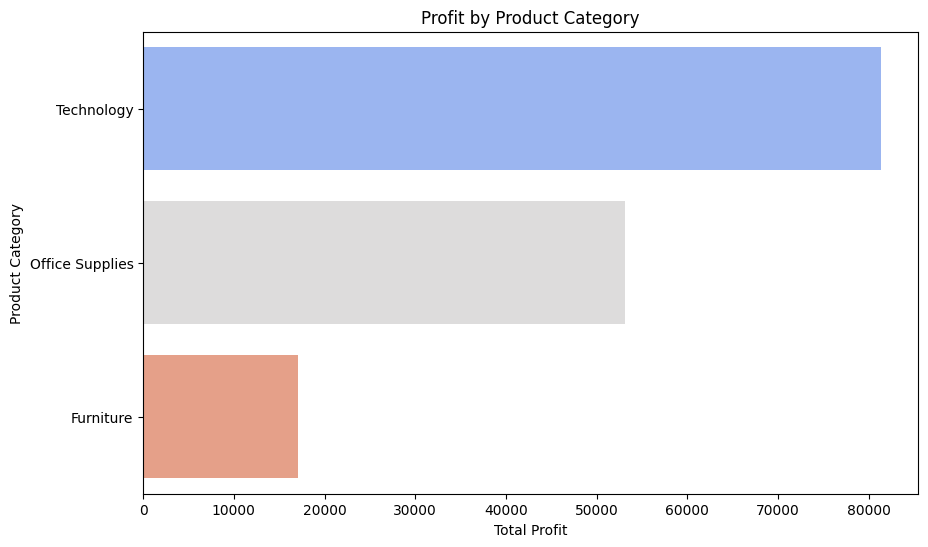

In [149]:
# Sort data by Profit in descending order
category_performance_sorted = category_performance.sort_values(by='Profit', ascending=False)

# Horizontal bar plot for Profit by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Product_Category', data=category_performance_sorted, palette='coolwarm',hue='Product_Category', dodge=False, legend=False)
plt.title('Profit by Product Category')
plt.xlabel('Total Profit')
plt.ylabel('Product Category')
plt.show()


 6.Customer and Product Cross-Sell Analysis

Use Case: Identify which customer segments frequently purchase certain product categories.

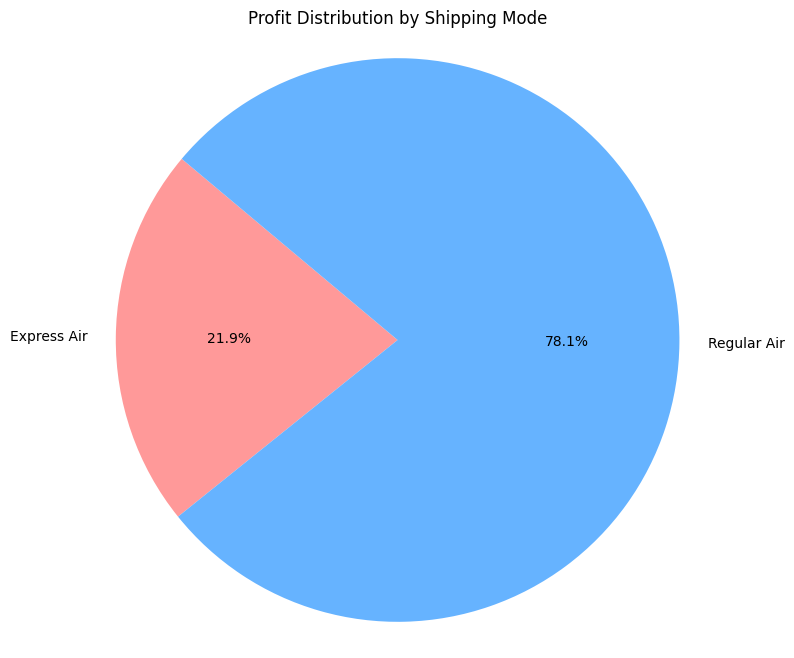

In [152]:
# Calculate profit by shipping mode
shipping_profit = maindf.groupby('Ship_Mode').agg({'Profit': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(shipping_profit['Profit'], labels=shipping_profit['Ship_Mode'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Profit Distribution by Shipping Mode')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
